In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_columns = None

In [4]:
k2dates=pd.read_csv('K2_Dates.csv')
tessdates=pd.read_csv('TESS_FFI_observation_times.csv')

In [5]:
bestlcs=pd.read_csv('bestlcs.csv')

In [6]:
tessdates=tessdates[['Sector','Orbit','Start Time', 'End Time']]
tessdates

,Sector,Orbit,Start Time,End Time
0,1,9,7/25/18 19:29,8/8/18 0:29
1,1,10,8/9/18 3:59,8/22/18 15:59
2,2,11,8/23/18 14:29,9/5/18 15:29
3,2,12,9/7/18 2:29,9/19/18 23:59
4,3,13,9/20/18 4:59,9/21/18 0:29
...,...,...,...,...
282,91,190,4/23/25 22:09,4/30/25 13:52
283,91,190,4/30/25 18:56,5/7/25 6:09
284,92,191,5/7/25 11:09,5/14/25 0:09
285,92,192,5/21/25 4:29,5/27/25 10:32


In [7]:
tessdates['Start Time']=pd.to_datetime(tessdates['Start Time'])
tessdates['End Time']=pd.to_datetime(tessdates['End Time'])

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_39069/485386574.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tessdates['Start Time']=pd.to_datetime(tessdates['Start Time'])
/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_39069/485386574.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tessdates['End Time']=pd.to_datetime(tessdates['End Time'])


In [8]:
#tessdates

In [9]:
#tessdates['End Time'].min() found a weird outlier here originally and fixed the entry in the original data table

In [10]:
#tessdates.loc[tessdates['End Time'].idxmin()]

In [11]:
tessdates=tessdates.groupby('Sector').agg({'Start Time':'min','End Time':'max'}) #getting rid of gaps in the sectors

In [12]:
tessdates=tessdates.reset_index()

In [13]:
#tessdates

In [14]:
# plt.scatter(tessdates['Start Time'],tessdates['Sector'])
# plt.scatter(tessdates['End Time'],tessdates['Sector'])

In [15]:
k2dates=k2dates[['Campaign','Start','Stop']]

In [16]:
k2dates['Start']=pd.to_datetime(k2dates['Start'],format='%Y %b %d')
k2dates['Stop']=pd.to_datetime(k2dates['Stop'],format='%Y %b %d')

In [17]:
#k2dates

In [18]:
# plt.scatter(k2dates['Start'],k2dates['Campaign'])
# plt.scatter(k2dates['Stop'],k2dates['Campaign'])

In [19]:
#bestlcs

In [20]:
bestlcs['TIC']=bestlcs['TIC'].astype('Int64').astype('string')
bestlcs['gaiadr3_source_id']=bestlcs['gaiadr3_source_id'].astype('Int64').astype('string')
bestlcs['epic_id']=bestlcs['epic_id'].astype('Int64').astype('string')

In [21]:
obstimes=pd.DataFrame(columns=['pop_id','TIC','gaiadr3_source_id','epic_id',
                               'per','disco_paper','author','paper_year',
                               'lcstring','secorcamp','start','stop'])

In [22]:
obstimes

,pop_id,TIC,gaiadr3_source_id,epic_id,per,disco_paper,author,paper_year,lcstring,secorcamp,start,stop


In [23]:
start_col=bestlcs.columns.get_loc('Sector 1')

In [24]:
for index, row in bestlcs.iterrows(): #iterate through each object
    for col in bestlcs.columns[start_col:]: #iterate through all the columns starting with the sectors
        value=row[col]
        if not pd.isna(value):
            new_row=pd.DataFrame([{'pop_id': row['pop_id'], 'TIC': row['TIC'],
                                   'gaiadr3_source_id': row['gaiadr3_source_id'], 'epic_id': row['epic_id'],
                                   'per': row['per'],'disco_paper': row['disco_paper'],
                                   'author': row['author'],'paper_year': row['paper_year'],
                                   'lcstring': value,'secorcamp': col, 'start': '', 'stop': ''}])
            obstimes=pd.concat([obstimes, new_row], ignore_index=True)

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_39069/692303301.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  obstimes=pd.concat([obstimes, new_row], ignore_index=True)


In [25]:
#obstimes

In [26]:
for index, row in obstimes.iterrows(): #iterate through all the rows and their sectors
    parts=row['secorcamp'].split(' ')
    secorcamp=parts[0]
    number=int(parts[1])
    if secorcamp=='Sector':
        tessrow=tessdates[tessdates['Sector']==number]
        obstimes.at[index,'start']=tessrow['Start Time'].values[0]
        obstimes.at[index,'stop']=tessrow['End Time'].values[0]
    elif secorcamp=='Campaign':
        k2row=k2dates[k2dates['Campaign']==number]
        obstimes.at[index,'start']=k2row['Start'].values[0]
        obstimes.at[index,'stop']=k2row['Stop'].values[0]

In [27]:
#obstimes

In [28]:
# plt.scatter(obstimes['start'],obstimes['pop_id'],s=1)
# plt.scatter(obstimes['stop'],obstimes['pop_id'],s=1)
# plt.gca().invert_yaxis()
# plt.ylabel('pop_id')
# plt.xlabel('time')
# plt.show()

In [29]:
# for index, row in obstimes.iterrows():
#     x1=row.start
#     x2=row.stop
#     curid=row.pop_id
#     plt.plot([x1,x2],[curid,curid],color='#000000')
# plt.gca().invert_yaxis()
# plt.ylabel('pop_id')
# plt.xlabel('time')
# plt.show()

In [30]:
obstimes['time_diff']=obstimes['stop']-obstimes['start']

In [31]:
totalobstimes=obstimes.groupby('pop_id').agg({'time_diff':'sum','start':'min','stop':'max','disco_paper':'first'})

In [32]:
totalobstimes.reset_index(inplace=True)

In [33]:
totalobstimes.rename(columns={'time_diff':'total_obs_time'},inplace=True)

In [34]:
totalobstimes.sort_values(by=['total_obs_time','start','disco_paper'],inplace=True)

In [35]:
totalobstimes.reset_index(inplace=True)

In [36]:
obstimes['display_order']=''

In [37]:
for index, row in obstimes.iterrows():
    curpopid=row['pop_id']
    newindex=totalobstimes.index[totalobstimes['pop_id']==curpopid].tolist()[0]
    obstimes.at[index,'display_order']=newindex

In [38]:
conditions=[obstimes['disco_paper']=='Rebull_2016',
            obstimes['disco_paper']=='Stauffer_2017',
            obstimes['disco_paper']=='Stauffer_2018',
            obstimes['disco_paper']=='Rebull_2018',
            obstimes['disco_paper']=='Zhan_2019',
            obstimes['disco_paper']=='Rebull_2020',
            #obstimes['disco_paper']=='Koen_2020', - don't discover anything
            obstimes['disco_paper']=='Stauffer_2021',
            #obstimes['disco_paper']=='Koen_2021',
            #obstimes['disco_paper']=='Guenther_2022',
            obstimes['disco_paper']=='Rebull_2022',
            #obstimes['disco_paper']=='Koen_2022',
            obstimes['disco_paper']=='Popinchalk_2023',
            obstimes['disco_paper']=='Bouma_2024',
            obstimes['disco_paper']=='Popinchalk_2024']
outcomes=['#00007f', #rebull 1
          '#996300', #stauffer 1
          '#ffa500', #stauffer 2
          '#0000cc', #rebull 2
          '#00ff00', #zhan 1
          '#4c4cff', #rebull 3
          '#ffc966', #stauffer 3
          '#b2b2ff', #rebull 4
          '#b20e66', #popinchalk 1
          '#00ced1', #bouma 1
          '#ff5ab3'] #popinchalk 2
obstimes['color']=np.select(conditions,outcomes)

In [39]:
obstimes['author'].unique() 

array(['Stauffer', 'Rebull', 'Popinchalk', 'Bouma', 'Zhan'], dtype=object)

base colors for each author:
- Stauffer - '#ffa500'
- Rebull - '#0000ff'
- Popinchalk - '#ff1493'
- Zhan - '#00ff00'
- Bouma - '#00ced1'

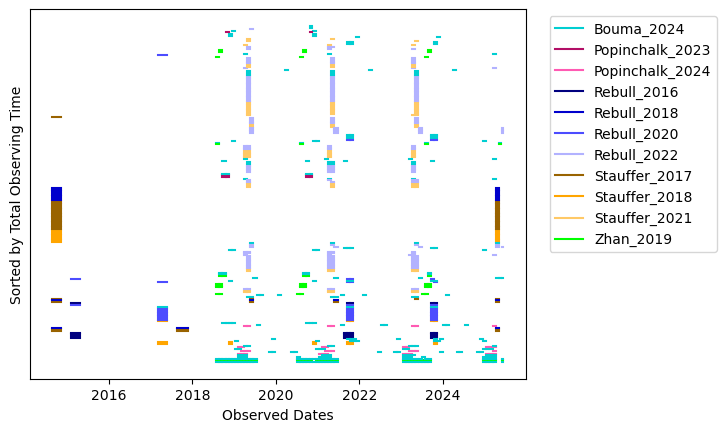

In [41]:
for index, row in obstimes.iterrows():
    x1=row.start
    x2=row.stop
    ycoord=row.display_order
    plt.plot([x1,x2],[ycoord,ycoord],color=row.color,label=row.disco_paper)
plt.gca().invert_yaxis()
plt.ylabel('Sorted by Total Observing Time')
plt.xlabel('Observed Dates')
plt.yticks([])
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
sorted_items = sorted(unique.items(), key=lambda item: item[0])
sorted_labels, sorted_handles = zip(*sorted_items)
plt.legend(sorted_handles, sorted_labels, loc='upper right', bbox_to_anchor=(1.4, 1))
plt.savefig('BaselineFigure.png',bbox_inches='tight')
plt.show()

In [42]:
totalobstimes['obs_days']=totalobstimes['total_obs_time']/np.timedelta64(1, 'D')

In [43]:
print("Min: ",totalobstimes['obs_days'].min())
print("Max: ",totalobstimes['obs_days'].max())
print("Median: ",totalobstimes['obs_days'].median())
print("Mean: ",totalobstimes['obs_days'].mean())

Min:  25.430555555555557
Max:  1036.8944444444444
Median:  109.47222222222223
Mean:  134.15224692841878


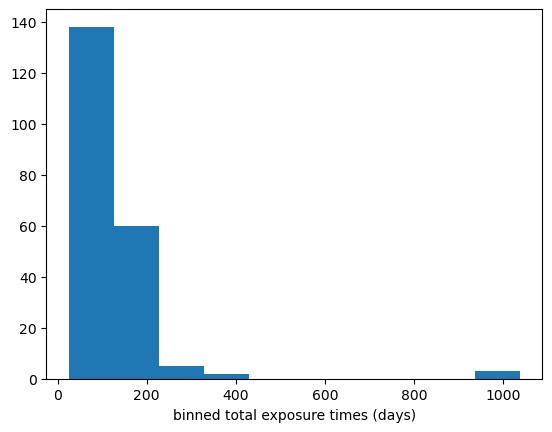

In [44]:
plt.hist(totalobstimes['obs_days'])
plt.xlabel('binned total exposure times (days)')
plt.show()

In [45]:
#totalobstimes

In [46]:
totalobstimes.shape[0]

208

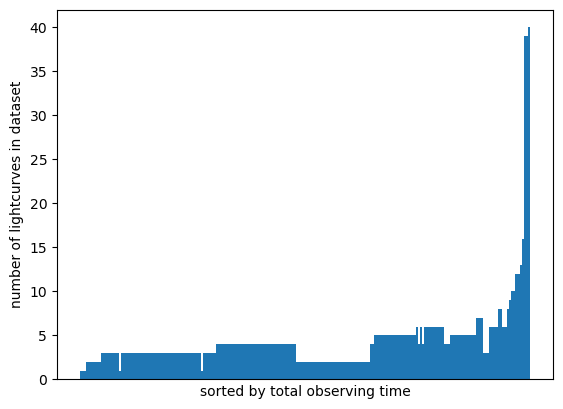

In [47]:
plt.hist(obstimes['display_order'], bins=totalobstimes.shape[0])
plt.xticks([])
plt.ylabel('number of lightcurves in dataset')
plt.xlabel('sorted by total observing time')
plt.show()

In [48]:
obstimes[obstimes['pop_id']==110].shape

(40, 15)

In [49]:
parts=np.char.split(obstimes['lcstring'].values.astype(str), sep="-")

In [50]:
parts_2d=np.array([p for p in parts])

In [51]:
obstimes['cadence_type']=parts_2d[:,4]

In [52]:
counts=obstimes['cadence_type'].value_counts()

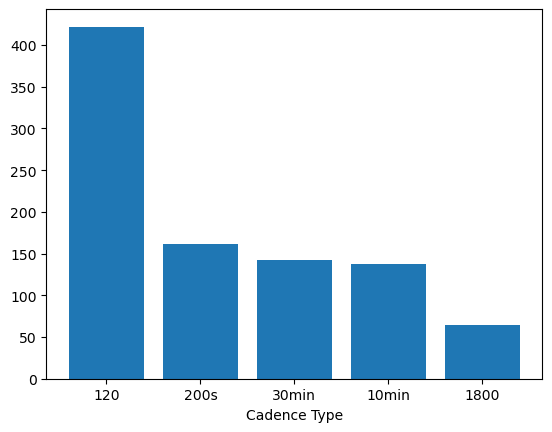

In [53]:
plt.bar(counts.index,counts.values)
plt.xlabel('Cadence Type')
plt.show()

In [54]:
totalobstimes['total_baseline']=totalobstimes.stop-totalobstimes.start

In [110]:
totalobstimes['baseline_day']=totalobstimes['total_baseline']/np.timedelta64(1, 'D')

In [118]:
np.mean(totalobstimes['baseline_day'])

2113.0479533920934

In [120]:
np.median(totalobstimes['baseline_day'])

1753.0569444444445

In [126]:
totalobstimes['coverage']=totalobstimes['obs_days']/totalobstimes['baseline_day']

In [134]:
np.mean(totalobstimes['coverage'])

0.09287584428752016

In [136]:
np.median(totalobstimes['coverage'])

0.05617441147823696

In [138]:
np.min(totalobstimes['coverage'])

0.027996176010772242

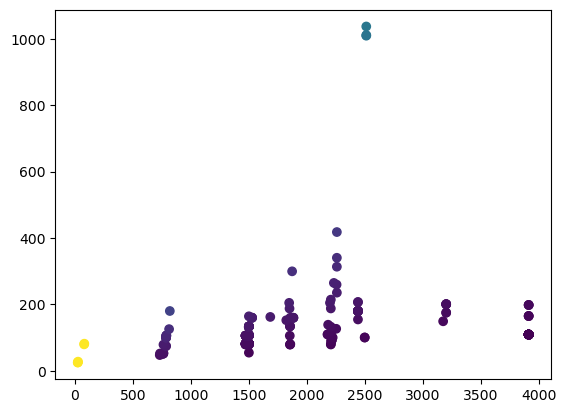

In [148]:
plt.scatter(totalobstimes['baseline_day'],totalobstimes['obs_days'],c=totalobstimes['coverage'])